**Procedures:**

9.4 Introduction to Seaborn\
9.5 Formatting Plots\
9.6 Customizing Visualizations

# 9.4 Introduction to Seaborn

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
 'datasets/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('datasets/earthquakes.csv')

### Categorical data

In [5]:
quakes.assign(
 time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
 "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


### stripplot()

<Axes: xlabel='magType', ylabel='mag'>

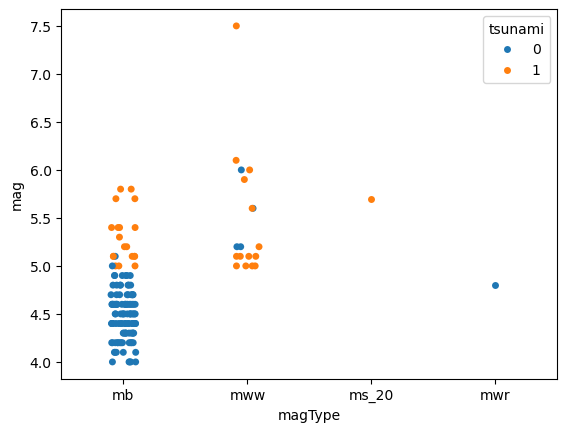

In [9]:
sns.stripplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)

### swarmplot()

<Axes: xlabel='magType', ylabel='mag'>

C:\Users\uSerr\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


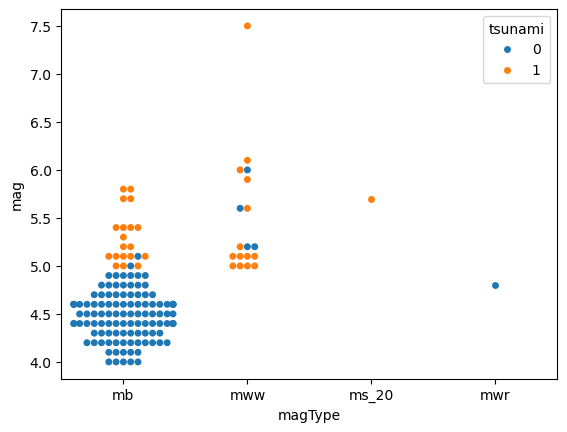

In [12]:
sns.swarmplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)

### Correlations and Heatmaps

<Axes: >

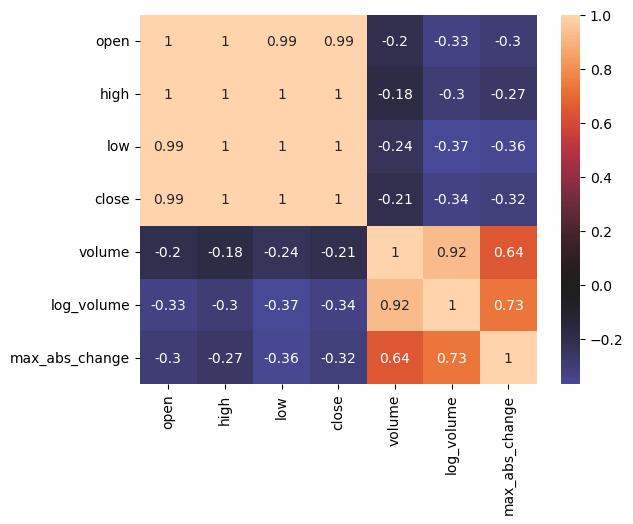

In [15]:
sns.heatmap(
 fb.sort_index().assign(
 log_volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).corr(),
    annot=True, center=0
)

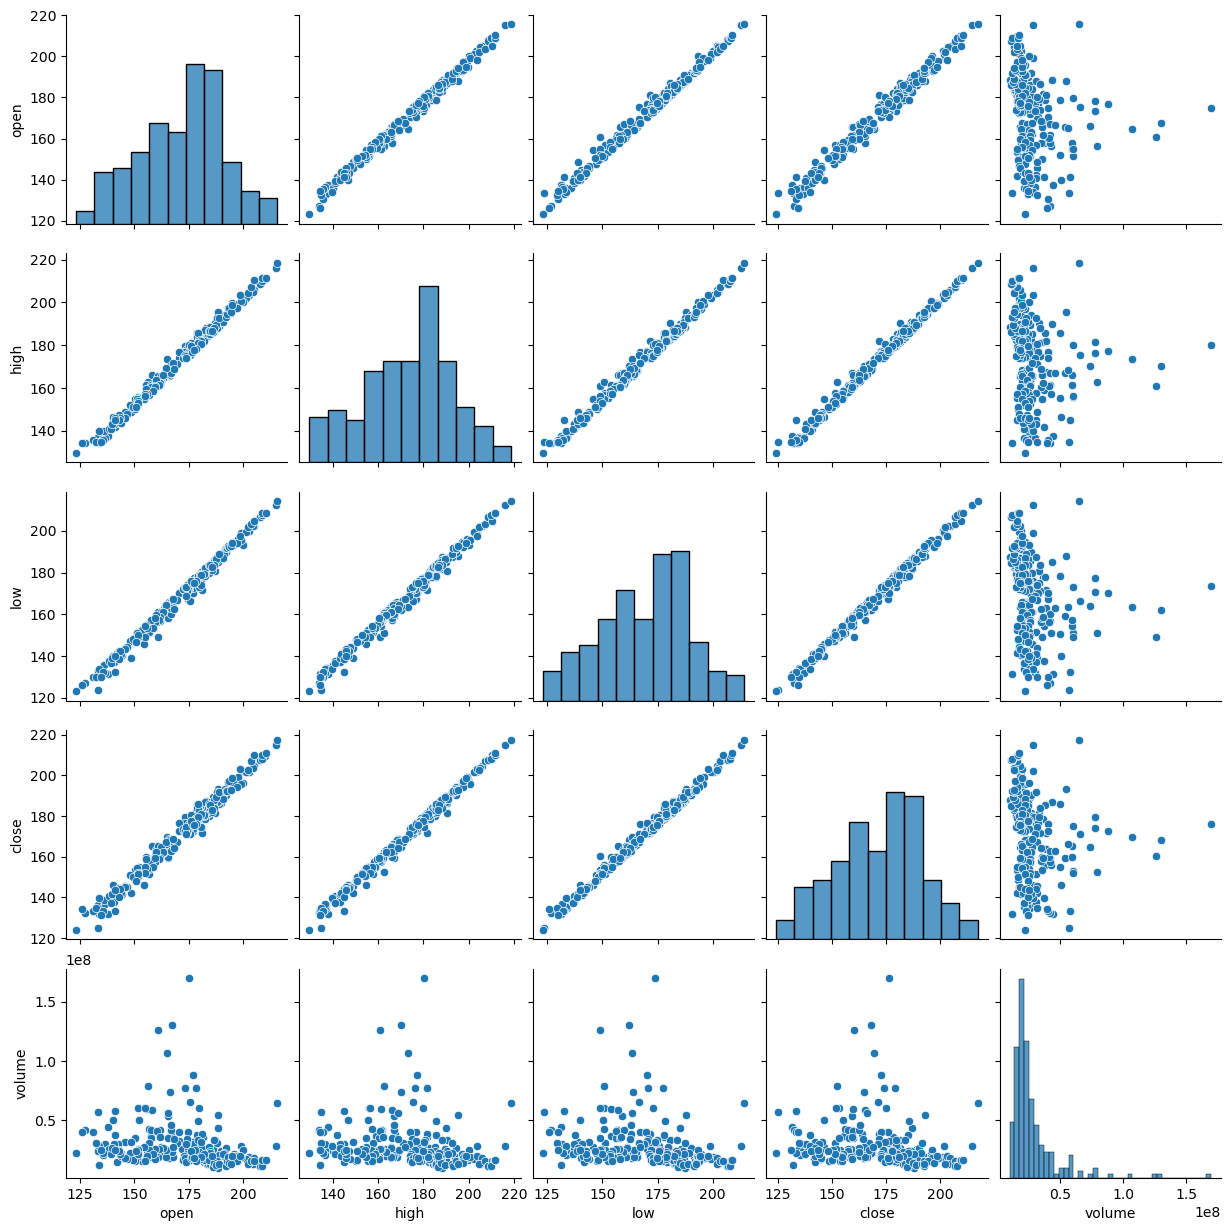

In [17]:
sns.pairplot(fb)

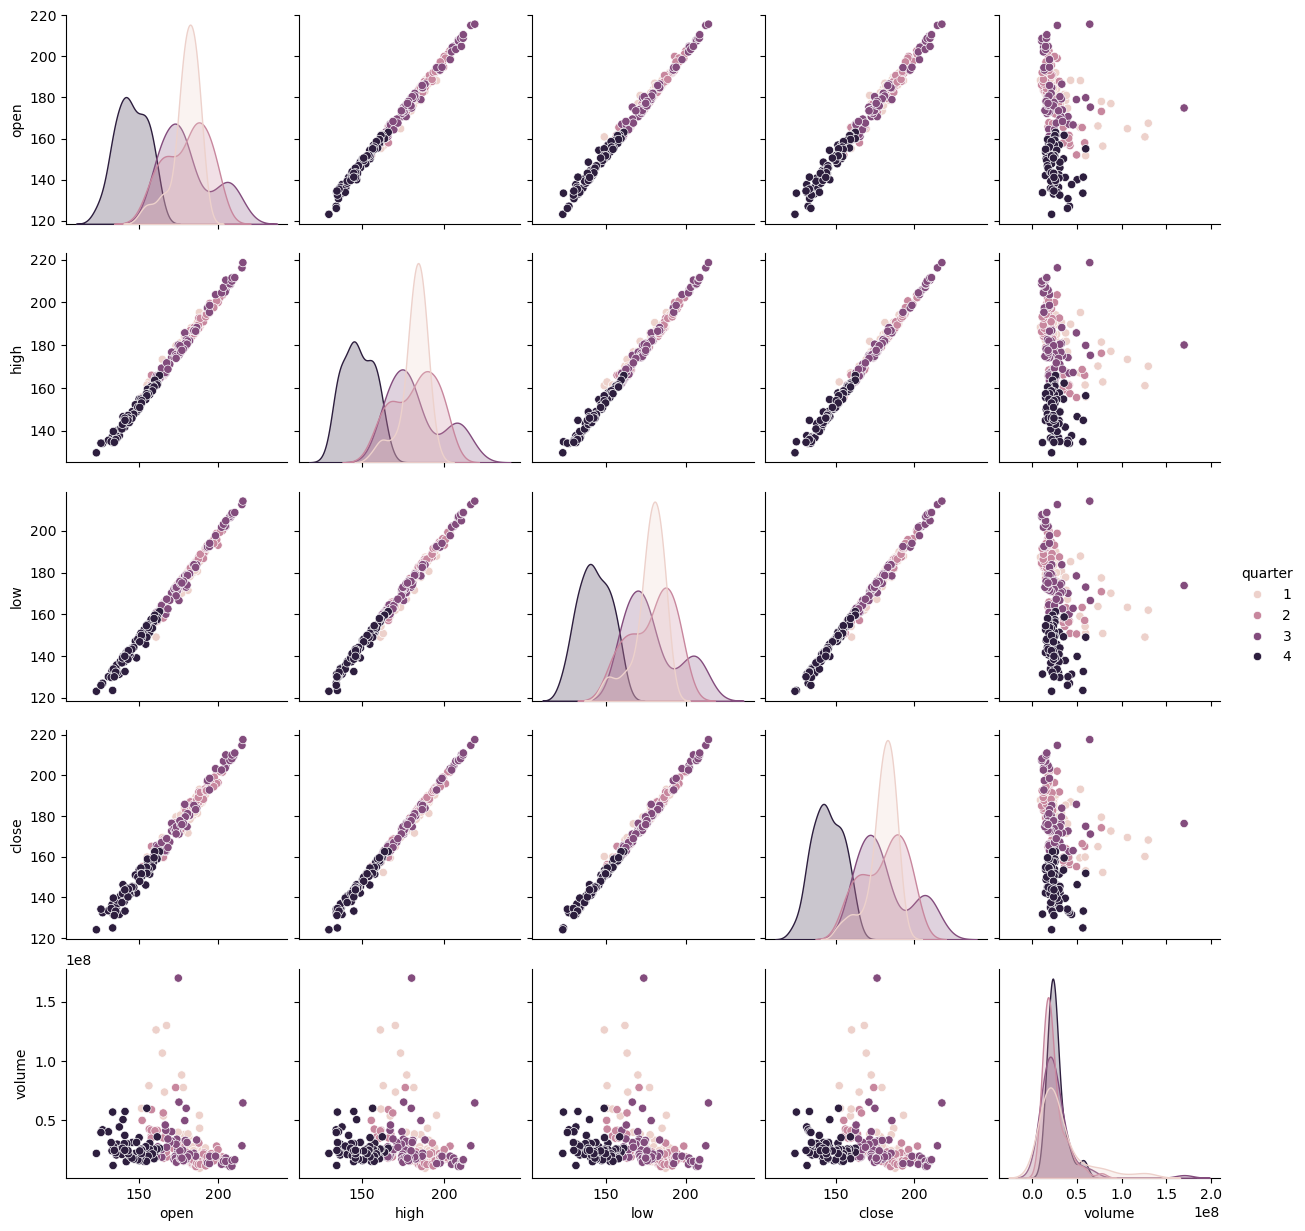

In [18]:
sns.pairplot(
 fb.assign(quarter=lambda x: x.index.quarter),
 diag_kind='kde',
 hue='quarter'
)

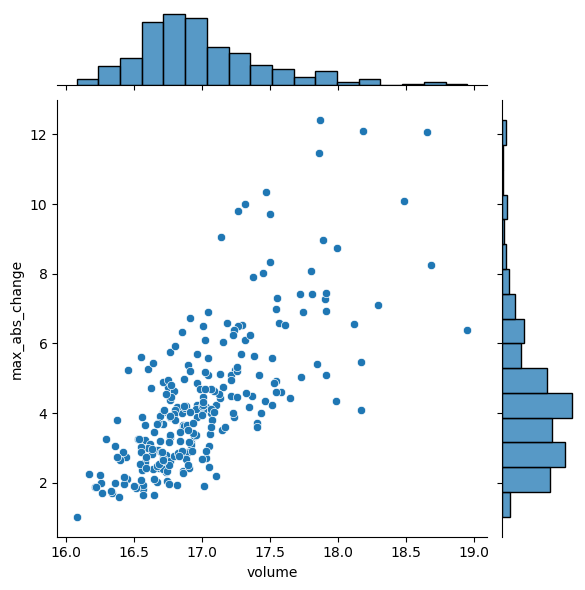

In [19]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

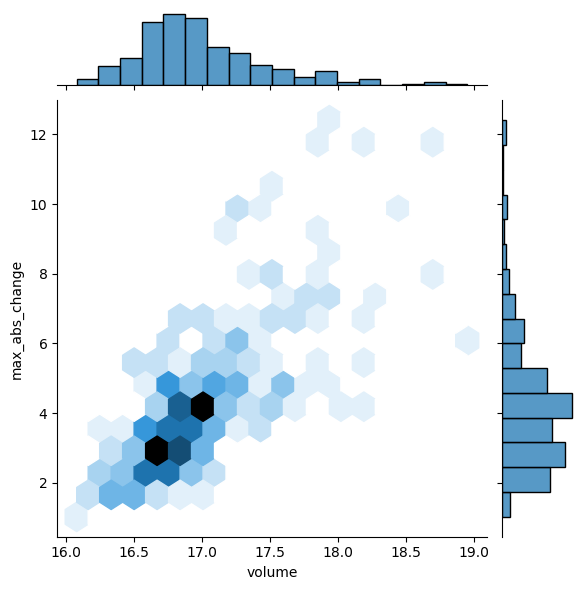

In [20]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='hex',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

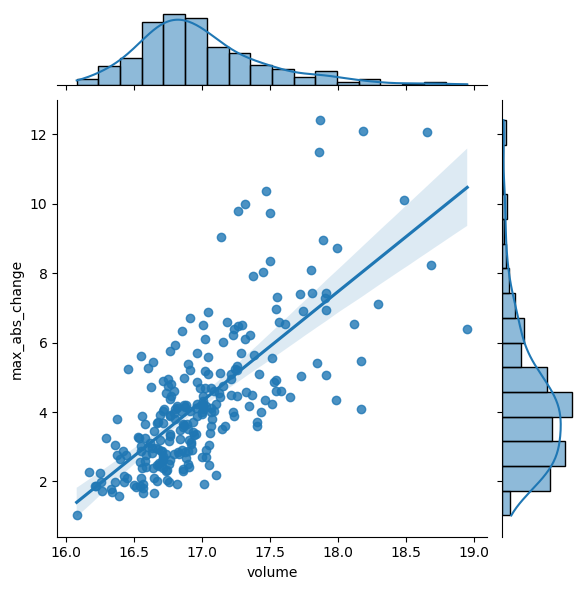

In [21]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='reg',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

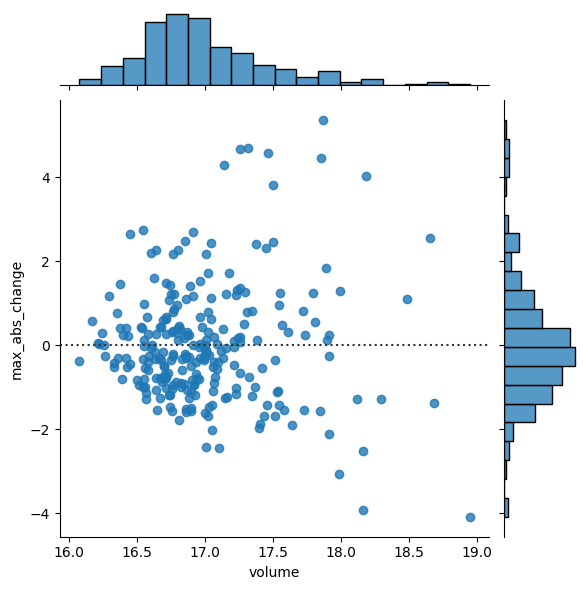

In [22]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='resid',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

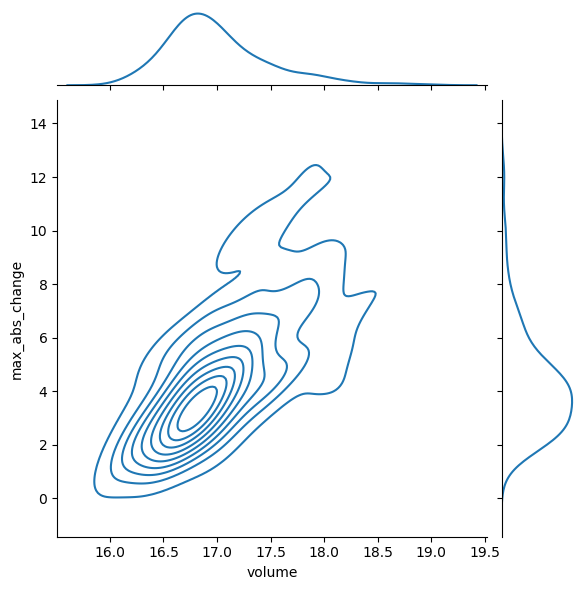

In [23]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='kde',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

### Regression plots

In [26]:
fb_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [27]:
import itertools
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
 print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
 print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [28]:
iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
 print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
 print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


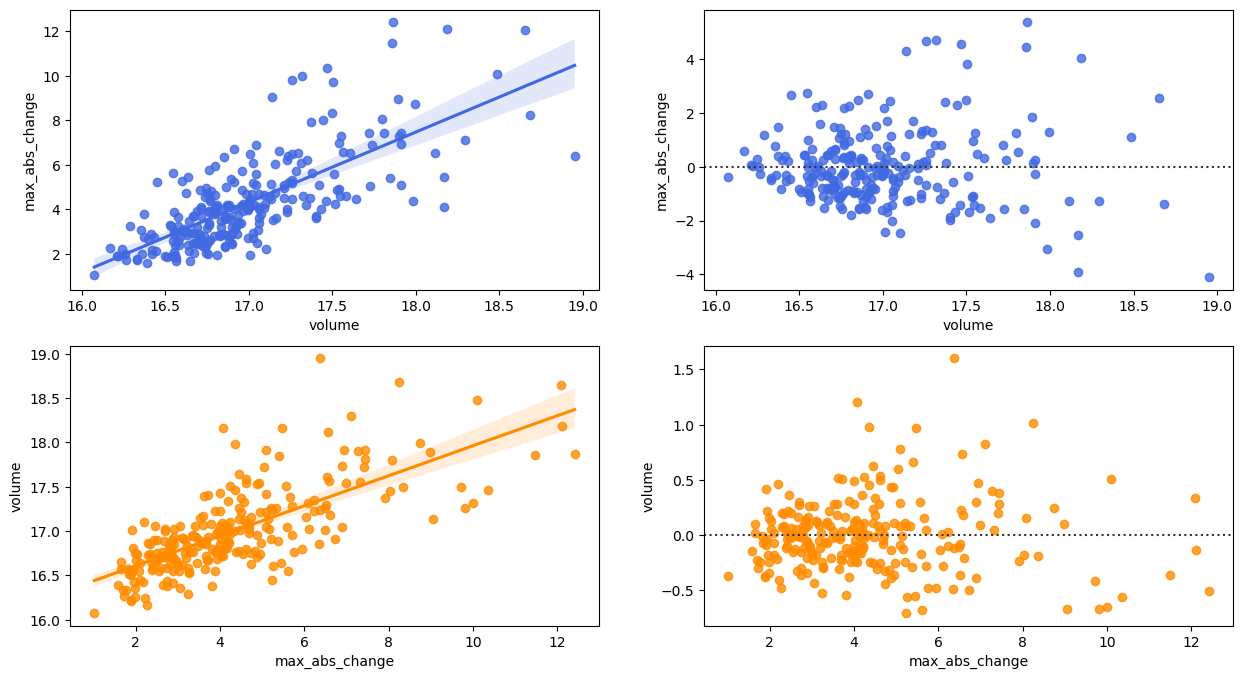

In [32]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

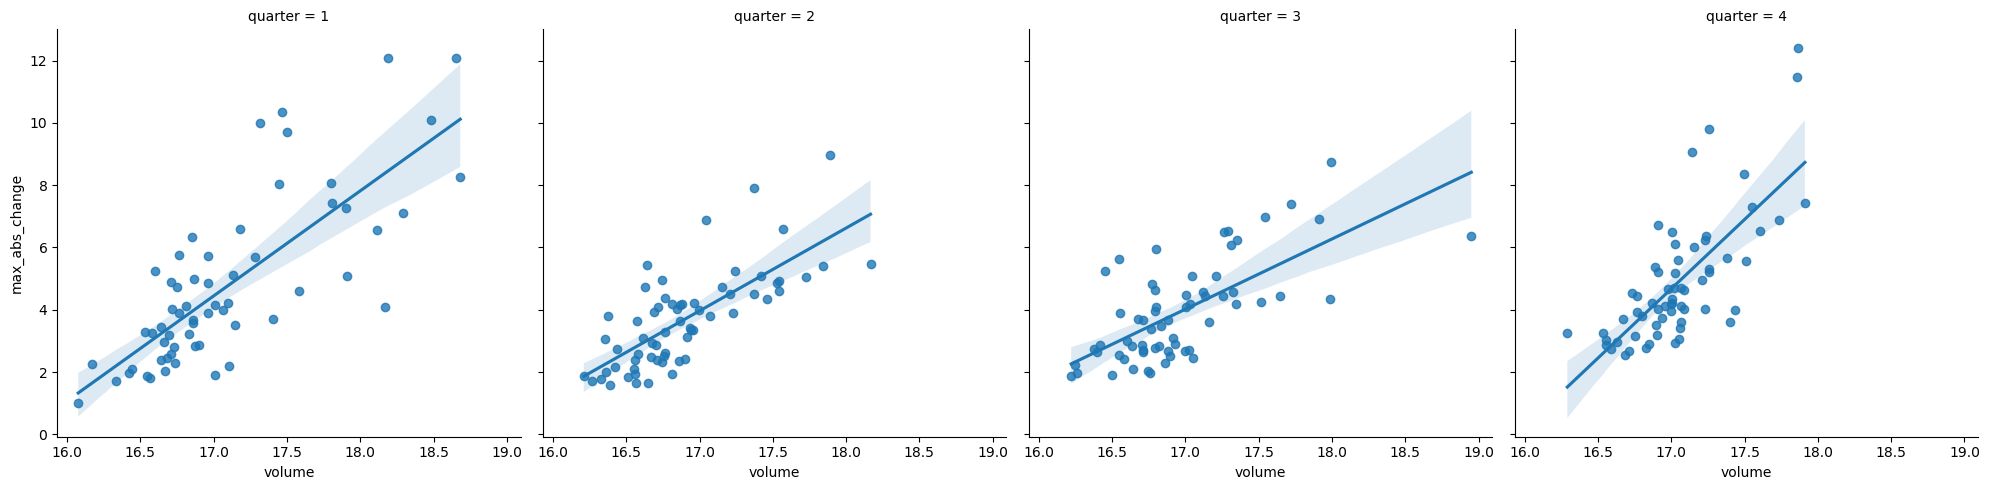

In [54]:
sns.lmplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low,
 quarter=lambda x: x.index.quarter
 ),
 col='quarter'
)

### Distributions

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

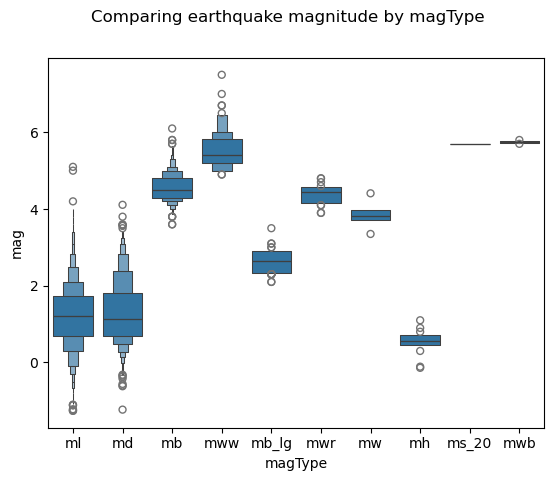

In [58]:
sns.boxenplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

C:\Users\uSerr\AppData\Local\Temp\ipykernel_5952\1057503649.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

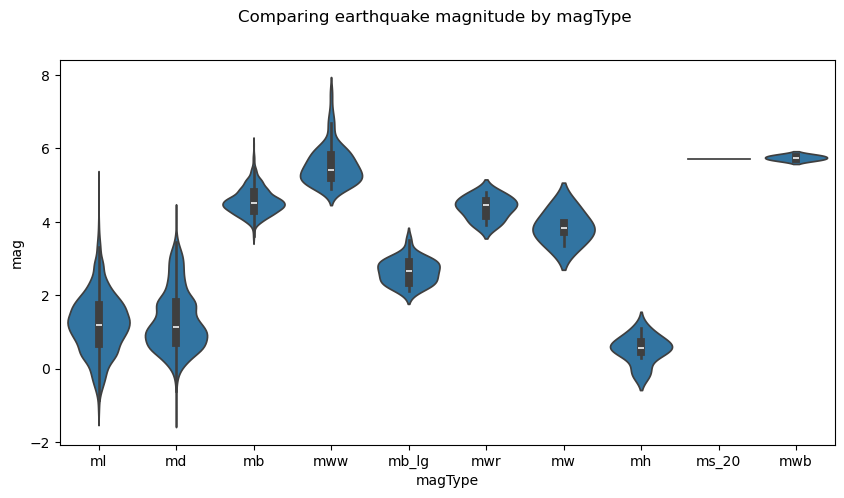

In [60]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']],
 ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

### Faceting

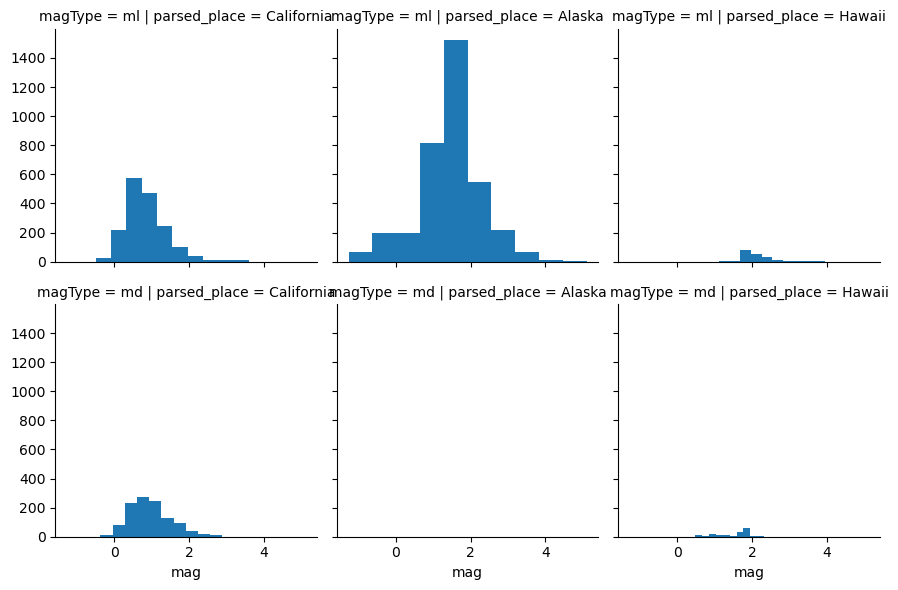

In [64]:
g = sns.FacetGrid(
 quakes[
 (quakes.parsed_place.isin([
 'California', 'Alaska', 'Hawaii'
 ]))\
 & (quakes.magType.isin(['ml', 'md']))
 ],
 row='magType',
 col='parsed_place'
)
g = g.map(plt.hist, 'mag')

# 9.5 Formatting Plots

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
 'datasets/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

### Titles and Axis Labels

Text(0, 0.5, 'price ($)')

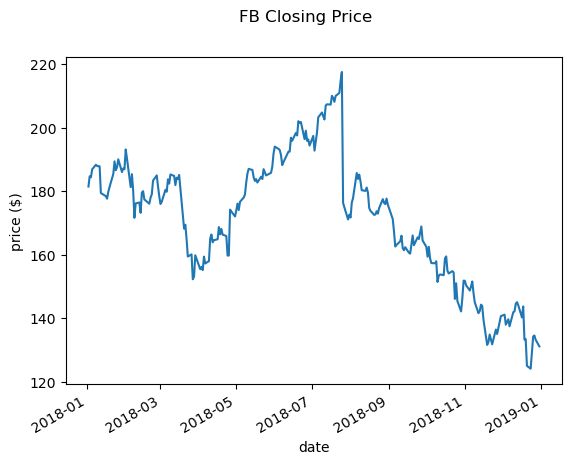

In [74]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

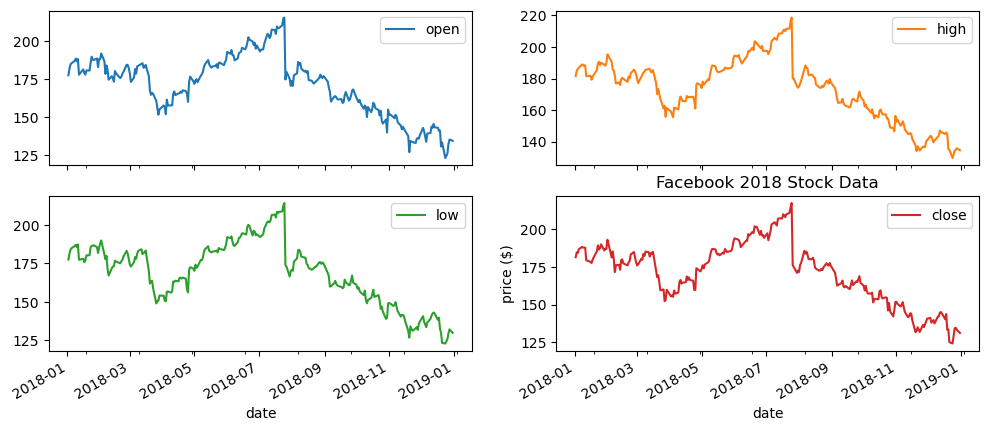

In [76]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

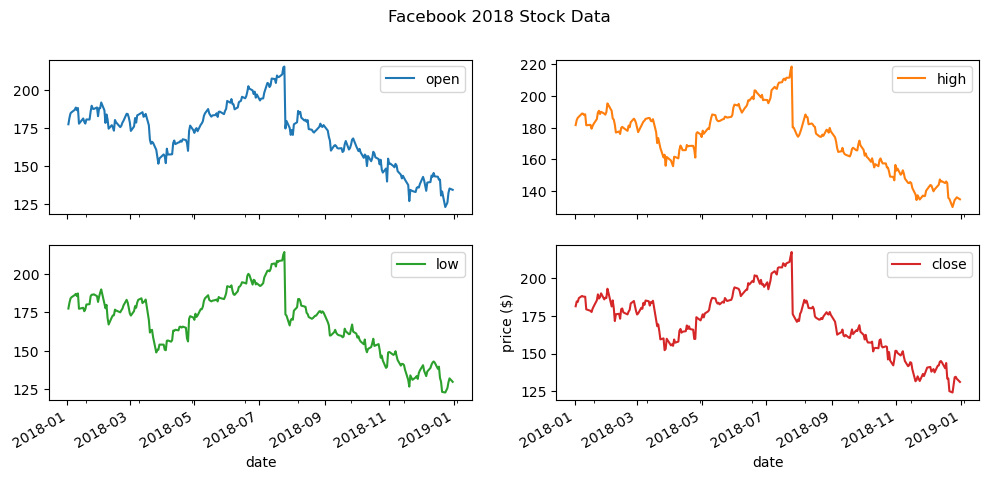

In [82]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data') # use in the future analysis when dealing with more than one axes with the same topic/idea
plt.xlabel('date')                       # title is more on a single rather than the entire figure,
plt.ylabel('price ($)')

### Legends

Text(0, 0.5, 'price ($)')

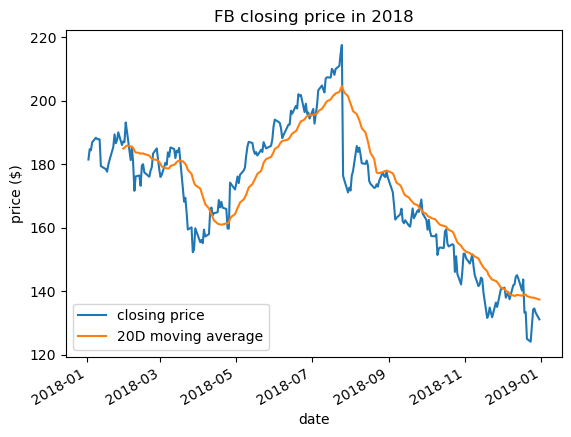

In [87]:
fb.assign(
 ma=lambda x: x.close.rolling(20).mean()
).plot(
 y=['close', 'ma'],
 title='FB closing price in 2018',
 label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

## Formatting Axes

### Specifying axis limits

Text(0, 0.5, 'price ($)')

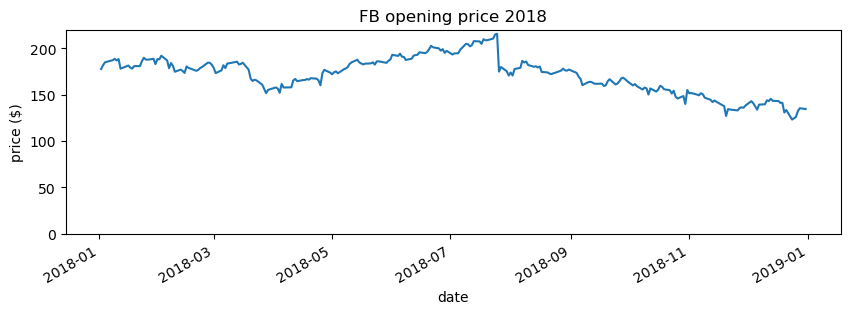

In [93]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

### Formatting the Axis Ticks

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

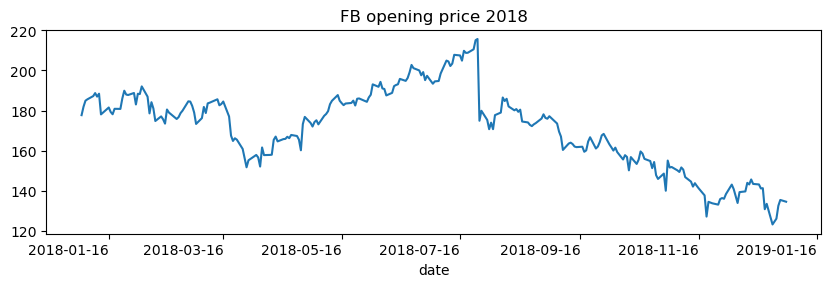

In [97]:
import calendar
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15 , calendar.month_name[1::2])
plt.ylabel('price ($)')

### Using ticker

Text(0, 0.5, 'percent of highest price ($218.62)')

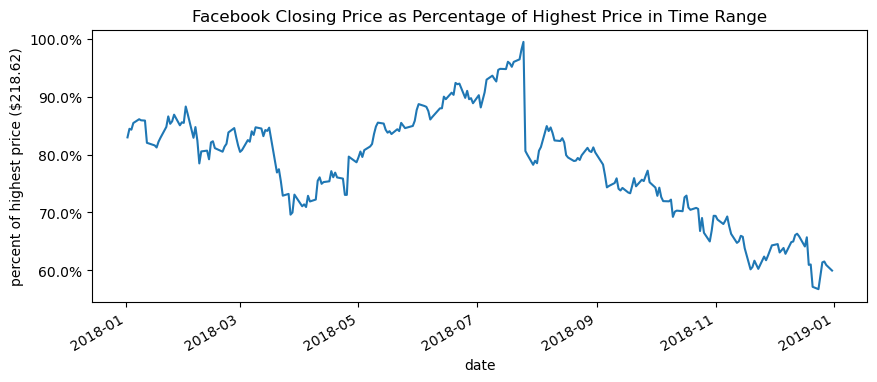

In [101]:
import matplotlib.ticker as ticker
ax = fb.close.plot(
 figsize=(10, 4),
 title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
 ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
 fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

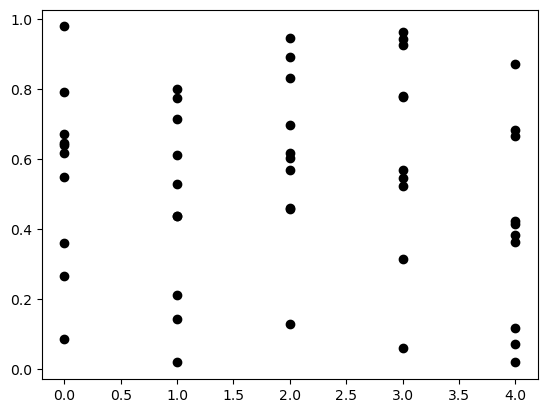

In [103]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

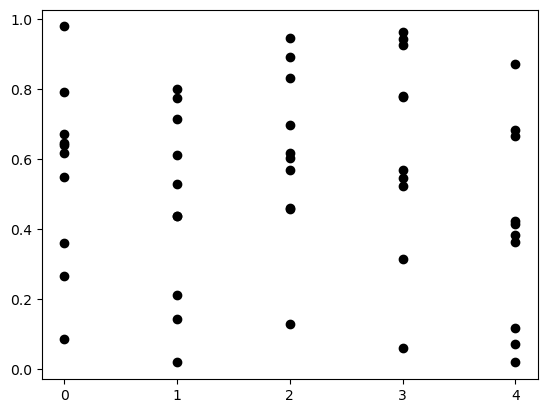

In [105]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
 ticker.MultipleLocator(base=1)
)

# 9.6 Customizing Visualizations

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
 'datasets/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

### Scatter matrix

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

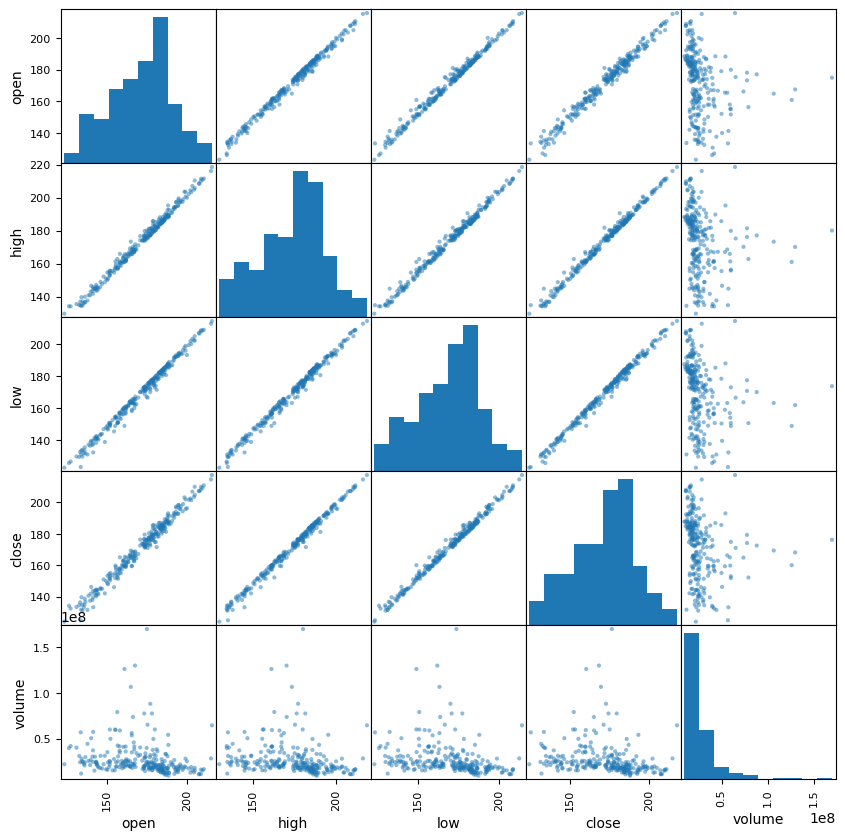

In [118]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

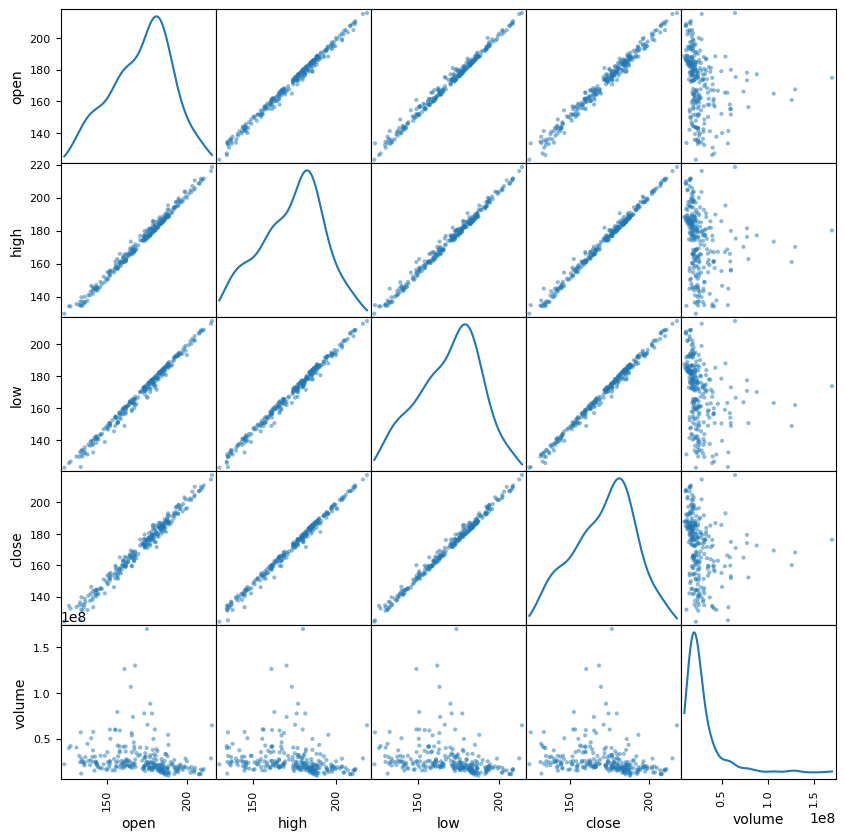

In [120]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

### Lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

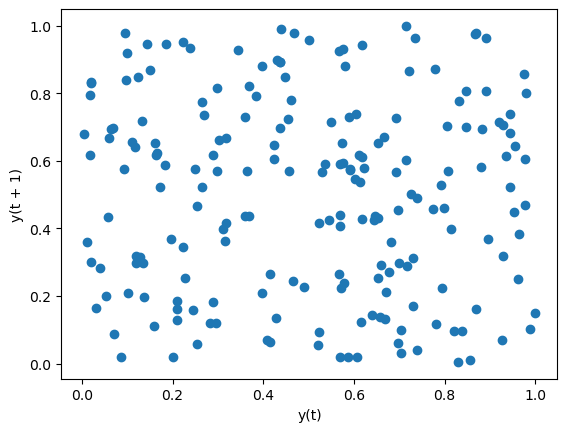

In [124]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

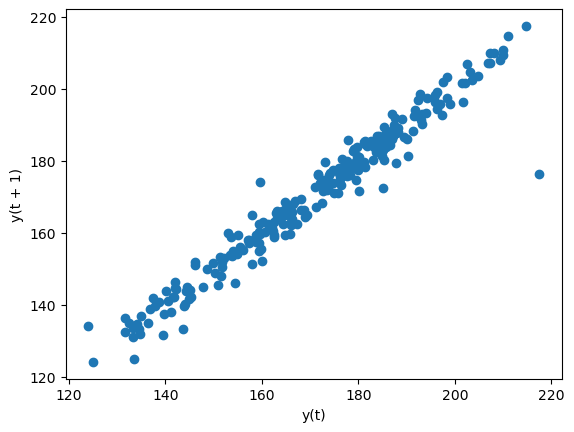

In [126]:
lag_plot(fb.close)

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

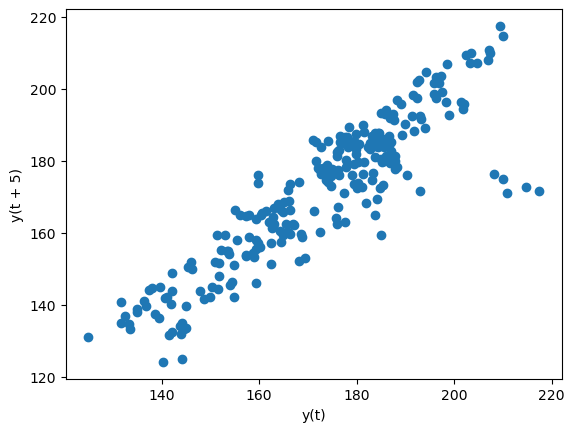

In [128]:
lag_plot(fb.close, lag=5)

### Autocorrelation plots

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

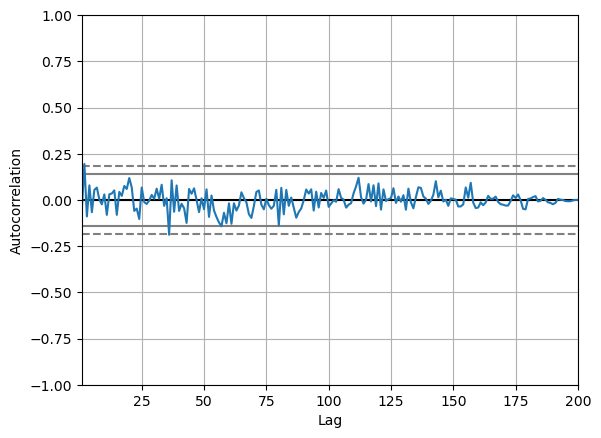

In [132]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

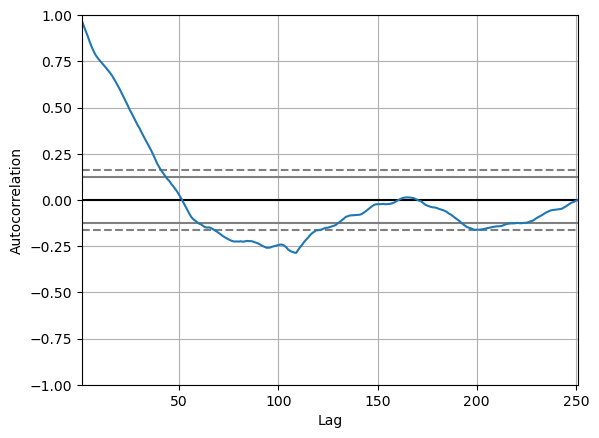

In [134]:
autocorrelation_plot(fb.close)

### Bootstrap plot

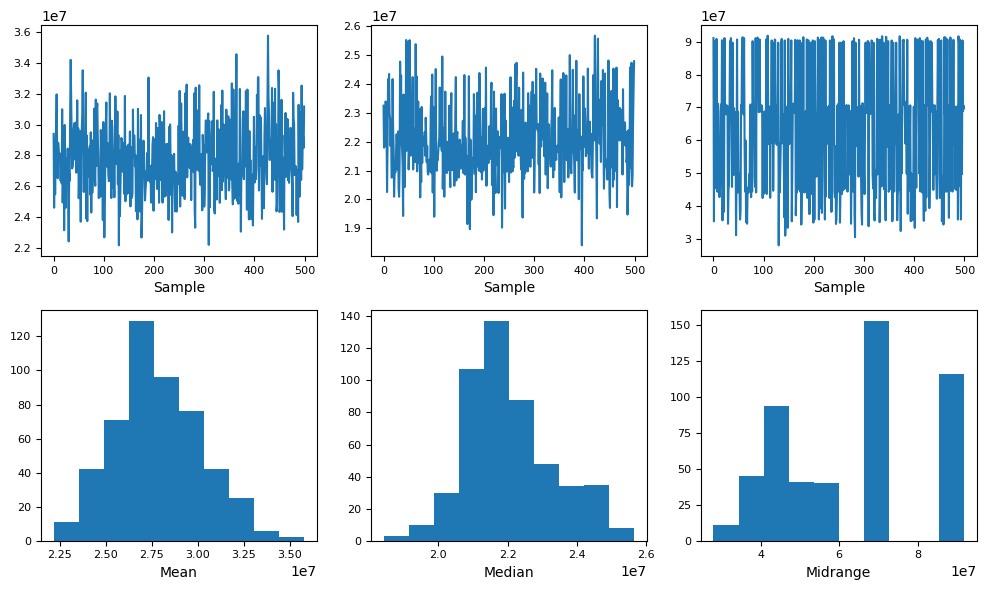

In [138]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))